In [1]:
import pandas as pd
import seaborn as sns
file = open('field_names.txt', 'r')
field_names = file.read().split('\n')
df = pd.read_csv('breast-cancer.csv', names=field_names)
df.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
# As you can see above, data file and header file provided is loaded and then
# attached it to the dataframe

Evaluating Dataset
Based on the data above, there are certain column names that is quiet different from the data. This is because the worst values have so much different then the mean values where in the first row, texture_mean = 1001 but texture_worst 0.27760. The data given is not logic since the worst value is smaller than the mean value, based on the given low standard error. The first step that im going to transform the data is to confirm that the column headings are correctly ordered relatively to the data.

#### Mean and Median Smoothness and Compactness for Benign and Malignant Tumors 

In [3]:
#median smoothness
df.groupby(['diagnosis']).median()[['smoothness_mean','compactness_mean']]

,smoothness_mean,compactness_mean
diagnosis,,
B,1.8510,0.01631
M,3.6795,0.02859


In [4]:
#mean smoothness
df.groupby(['diagnosis']).mean()[['smoothness_mean','compactness_mean']]

,smoothness_mean,compactness_mean
diagnosis,,
B,2.000321,0.021438
M,4.323929,0.032281


<AxesSubplot:title={'center':'radius_mean'}, xlabel='diagnosis'>

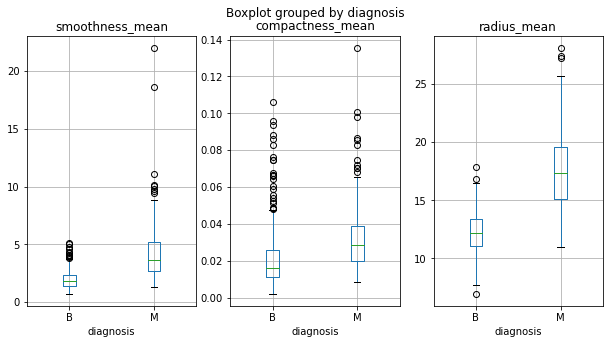

In [5]:
#### Box plots for distribution of mean and median smoothness and compactness
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
df.boxplot('smoothness_mean','diagnosis', ax=ax[0])
df.boxplot('compactness_mean','diagnosis', ax=ax[1])
df.boxplot('radius_mean','diagnosis', ax=ax[2])

Write function to generate bootstrap samples of the data.

In [6]:
from sklearn.utils import resample

def bootstrap_samples(dataframe,number_of_samples,sample_size):
    samples = []
    for x in range(0, number_of_samples):
        samples.append(resample(df, replace=True, n_samples=number_of_samples, random_state=1))    
    return samples

samples_array = bootstrap_samples(df,len(df),30)

In [7]:
samples_array

[           ID diagnosis  radius_mean  radius_sd_error  radius_worst  \
 37     854941         B        13.03            18.42         82.61   
 235  88249602         B        14.03            21.25         89.79   
 72     859717         M        17.20            24.52        114.20   
 144    869254         B        10.75            14.97         68.26   
 129    866674         M        19.79            25.12        130.40   
 ..        ...       ...          ...              ...           ...   
 218   8811842         M        19.80            21.56        129.70   
 405    904971         B        10.94            18.59         70.39   
 507  91544002         B        11.06            17.12         71.25   
 74    8610175         B        12.31            16.52         79.19   
 149    869931         B        13.74            17.91         88.12   
 
      texture_mean  texture_sd_error  texture_worst  perimeter_mean  \
 37          523.8           0.08983        0.03766         0.0

### Exploratory Analysis

#### Identify 2-3 Variables that are Predictive of a Malignant Tumor and Display the Relationship Visually and Explain

In [8]:
print("2.1 Prepare Data")
#2.1 Prepare Data
print("2.1.1 Encoding categorical diagnosis variable, B = 0; M = 1")
# encoding categorical diagnosis variable, B = 0; M = 1
df['diagnosis_type'] = df['diagnosis']
encode_diag = {"diagnosis_type":     {"B": 0, "M": 1}}
df = df.replace(encode_diag)

df_breastcancer = df
del df_breastcancer["ID"] #remove ID
df_breastcancer.head()

2.1 Prepare Data
2.1.1 Encoding categorical diagnosis variable, B = 0; M = 1


,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst,diagnosis_type
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


## Pearson Correlation Filter Method

Using the filter method to select variables that have high Pearson correlation to the diagnosis variables where the closest the correlation score to 1, the more the variable correlated to diagnosis.

In [9]:
# print("Compute features correlation with disgnosis variable")
print("\n")
#Compute features correlation with disgnosis variable
#Correlation with output variable
cor = df_breastcancer.corr()
cor_target = abs(cor["diagnosis_type"])
#Selecting highly correlated features (those with correlation score >0.7)
relevant_features = cor_target[cor_target>0.7]
sel_relevant_features = relevant_features.sort_values(ascending=False)[1:]
sig_cols = sel_relevant_features.keys().tolist()
print("Features and Correlation Score")
print(sel_relevant_features)
print("\n")
print("Variables that are predictive of a malignant tumor")
print(sig_cols)



Features and Correlation Score
fractal_dimension_mean     0.793566
concave_points_sd_error    0.782914
perimeter_sd_error         0.776614
concavity_worst            0.776454
radius_worst               0.742636
concave_points_worst       0.733825
radius_mean                0.730029
texture_mean               0.708984
Name: diagnosis_type, dtype: float64


Variables that are predictive of a malignant tumor
['fractal_dimension_mean', 'concave_points_sd_error', 'perimeter_sd_error', 'concavity_worst', 'radius_worst', 'concave_points_worst', 'radius_mean', 'texture_mean']


### 3 Variables that are predictive of a malignant tumor 

1. fractal_dimension_mean
2. concave_points_sd_error
3. perimeter_sd_error

#### Visuallized Variables Relationship and Explaination

Correlation Heatmap for all variables




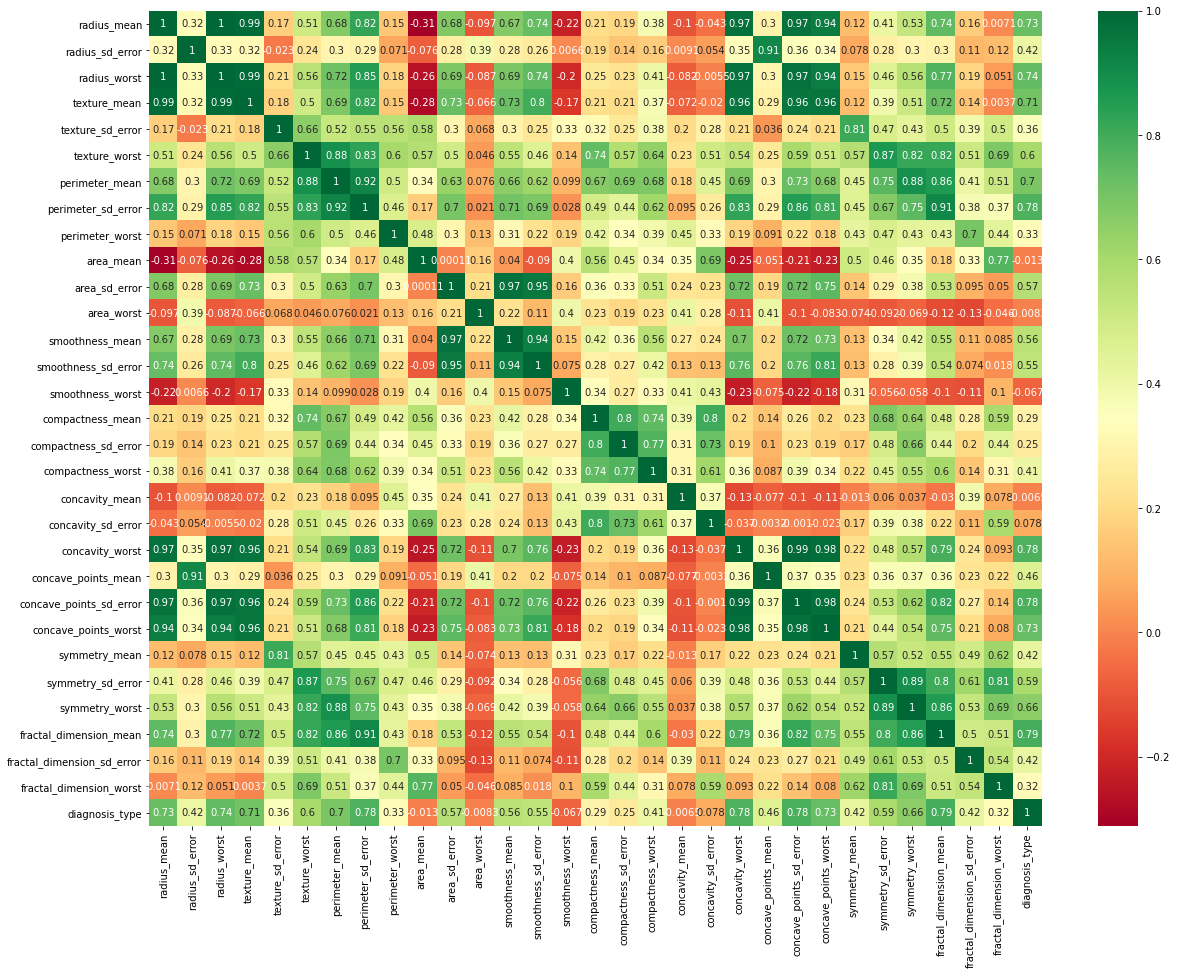

In [10]:
print("Correlation Heatmap for all variables")
print("\n")
#Using Pearson Correlation
plt.figure(figsize=(20,15))
sns.heatmap(cor, annot=True, cmap="RdYlGn") #cmap=plt.cm.Reds
plt.show()

Based on the correlation plot above, the closer the relation to 1 which is the green color in the plot, the more predictive this variable is to the diagnosis. The 3 variables which are perimeter_sd_error, concave_points_sd_error and fractal_dimension_mean are in green color with correlation above 0.7. Therefore, these changes in these 3 variables can greatly affect the diagnosis type.

## Model to Predict Malignant Tumors

Use atleast two classification techniques, compare and contrast the pros and cons.

### 1st Method - Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(df.drop(['diagnosis','diagnosis_type'],axis=1),
                                                    df['diagnosis'], test_size=0.30, random_state=301)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(C=10.0**-2,solver='liblinear')
logmodel.fit(X_train_std,y_train)
predictions = logmodel.predict(X_test_std)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           B       0.96      0.98      0.97       113
           M       0.96      0.91      0.94        58

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.95       171
weighted avg       0.96      0.96      0.96       171



In [13]:
import numpy as np

regularizationParam, auc, log_loss_difference = [], [], []

from sklearn.metrics import roc_auc_score

for c in np.arange(-5, 5):
    logmodel = LogisticRegression(C=10.0**c, random_state=0,solver='liblinear')
    logmodel.fit(X_train_std, y_train)
    regularizationParam = np.append(regularizationParam,c)
    auc = np.append(auc,roc_auc_score(y_test,logmodel.predict_proba(X_test_std)[:,1]))

#### The above code is to avoid overfitting by choosing the regularization parameter that does best on the test data.


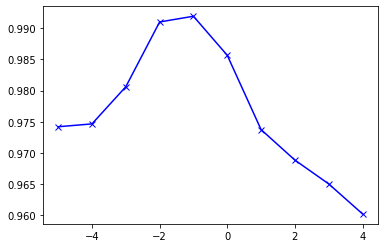

In [14]:
import matplotlib.pyplot as plt
plt.plot(regularizationParam, auc, color='blue', marker='x', label='mylabel')

The graph shows that the highest auc with a regularization parameter of c = -2.

### Evaluating Model Fit by Displaying a confusion matrix.

In [15]:
logmodel = LogisticRegression(C=10.0**-2, random_state=0,solver='liblinear')
logmodel.fit(X_train_std, y_train)
predictions = logmodel.predict(X_test_std)
confusion_matrix(y_test, predictions)

array([[111,   2],
       [  5,  53]], dtype=int64)

In [16]:
#### Classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           B       0.96      0.98      0.97       113
           M       0.96      0.91      0.94        58

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.95       171
weighted avg       0.96      0.96      0.96       171



Based on the absolute value of the coefficients, concavity_worst, concave_points_std_error, and fractal_dimension_mean are the three most important variables. Not surprisingly, the ID label is of low importance - this should just be a random ordering of the observations, so it would be surprising if it were predictive.

The full list of coefficients sorted by importance below:

In [17]:
coef_df = pd.DataFrame({'label': X_test.columns, 'abs coef': abs(logmodel.coef_[0]), 'coef': logmodel.coef_[0], 'odds ratio': np.exp(logmodel.coef_[0])}, columns=['label', 'abs coef', 'coef', 'odds ratio'])
coef_df.sort_values(by=['abs coef'], ascending=False)

,label,abs coef,coef,odds ratio
20,concavity_worst,0.230903,0.230903,1.259737
22,concave_points_sd_error,0.223048,0.223048,1.249880
27,fractal_dimension_mean,0.218251,0.218251,1.243899
23,concave_points_worst,0.210331,0.210331,1.234086
7,perimeter_sd_error,0.209507,0.209507,1.233070
0,radius_mean,0.205223,0.205223,1.227799
2,radius_worst,0.203984,0.203984,1.226279
3,texture_mean,0.197673,0.197673,1.218563
21,concave_points_mean,0.183733,0.183733,1.201695
10,area_sd_error,0.178014,0.178014,1.194843


### 2nd Method - Random Forest

Gridsearch is used to choose the hyperparameters that give the best result on crossvalidation. This allows us to choose hyperparameters that perform best on the test data, hence minimizing overfitting

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train_std, y_train)
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'log2',
 'n_estimators': 500}

The selected hyperparameters to train the final model.

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf =RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=6, criterion='entropy')
clf.fit(X_train_std, y_train)

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf =RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=6, criterion='entropy')
clf.fit(X_train_std, y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=200,
                       random_state=42)

In [21]:
predictions = clf.predict(X_test_std)
confusion_matrix(y_test, predictions)

array([[109,   4],
       [  5,  53]], dtype=int64)

Identify the most important predictve variables and explain how you identified.

In [22]:
randomforest_coef_df = pd.DataFrame({'label': X_test.columns, 'importances': clf.feature_importances_}, columns=['label', 'importances'])
randomforest_coef_df.sort_values(by=['importances'], ascending=False)

,label,importances
22,concave_points_sd_error,0.145164
27,fractal_dimension_mean,0.120652
7,perimeter_sd_error,0.114621
23,concave_points_worst,0.110697
20,concavity_worst,0.069102
3,texture_mean,0.052673
2,radius_worst,0.049746
0,radius_mean,0.048147
6,perimeter_mean,0.042845
13,smoothness_sd_error,0.032215


### Explaination to Technical Audiences:

In real life example, we might decide that we'd like to identify a high % of malignancies, even at the cost of incorrectly identifying some benign cases as malignant. We would set a risk threshold based on this decision.

More different model types could be tried. We could also try combining measurements (ratios, squares, products) to make other variables and creating binary variables for measurments that could be categorized as outliers.

If we look at the boxplot for smoothness_mean, essentially 100% of the high value outliers are for malignancies. We could create an smoothness_mean_high_outlier variable to improve the model.

The ID column should be removed from the model, since it is just a random number to identify the row. Before applying this model to other data sets, we'd want to confirm that the sample used to train the model was representive

### Explaination to Non-Technical Audiences:

When the best model predicts the tumor is malignant, it is correct 96.4% of the time and when it predicts the tumor is benign, it is correct 95.7% of the time.

For most of the risk factors, the likelihood of malignancy increases. Fractal_dimension_mean, concave_points_sd_error and perimeter_sd_error show the strongest association with malignancy.

By looking at muliple measurements for the tumor, the models can better distinguish malignant from benign tumors.

For the random forest model, concave_points_sd_error, concave_points_worst, and concavity_worst were the three most imporant predictors. For the logistic model, concavity_worst, concave_points_sd_error and fractal_dimension_mean were the top predictors. The logistic model increases the risk for each risk factor, without considering possible interactions between the risk factors, while the random forest model does capture those intractions.